In [4]:
# import glob

# # Buscamos todos los ficheros csv correspondientes a competiciones los concatenamos y los grabamos en base de datos

# lista_competiciones = glob.glob('competicion*.csv')
# df=pd.concat([pd.read_csv(comp) for comp in lista_competiciones])
# df.to_csv('base_datos.csv', index=False)

In [1]:
import pandas as pd
import os
pd.options.display.max_rows = 999

df=pd.read_csv('base_datos.csv')

#df.pivot_table(df, values = 'Nombre',index='M_F', columns=['Club','Anyo_nac'], aggfunc=lambda x: len(x.unique()))
df.pivot_table(values = 'Nombre', columns='M_F', index=['Club','Anyo_nac'], aggfunc=lambda x: len(x.unique())).unstack().fillna(0).astype(int)

M_F                 F            M         
Anyo_nac           10 11  12 13 10 11 12 13
Club                                       
C.N. Helios         0  0   0  5  7  8  0  0
C.N. Iz Cuarte      0  0   0  0  1  0  0  0
C.N. Teruel         0  0   0  0  1  0  0  0
E.M. El Olivar      0  0  11  7  8  9  0  0
H2ogo C.N.          0  0   0  2  1  3  0  0
P. San Agustin      0  0   9  2  5  1  0  0
Stadium Casablanca  0  0   2  0  2  2  0  0
Stadium Venecia     0  0   4  7  2  3  0  0

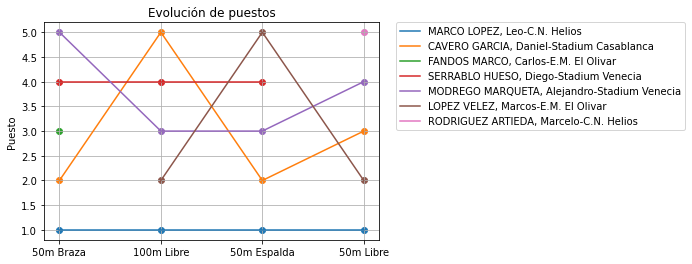

In [61]:
import matplotlib.pyplot as plt
anyo=11
genero='M'
top=5
df['id']=df.Nombre+"-"+df.Club
df2=df[(df.Anyo_nac==anyo) & (df.M_F==genero)][['Nombre','Club','Prueba','Puesto','id']]
# df2=df[(df.Anyo_nac==anyo) & (df.M_F==genero)].loc[:,['Nombre','Club','Prueba','Puesto']]

df4=pd.concat([df2[df2.Prueba==j].sort_values(by='Puesto',ascending=True).head(top) for j in df2.Prueba.unique()])

na = df4.id.unique()

fg, ax = plt.subplots()
ax.set_ylabel('Puesto')
ax.set_title('Evolución de puestos')

for n in na:
    df5=df4[df4.id==n]
#     display(df5)
#     ax.title('Evolución por puestos')
    plt.plot(df5.Prueba, df5.Puesto, label=n)
    plt.scatter(df5.Prueba, df5.Puesto)
    
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [9]:
df

,Puesto,Nombre,Anyo_nac,Club,Tiempo,Pts,Fecha,Prueba,Piscina,M_F,Competicion,Lugar,Edad,Temporada,Time_stamp
0,1,"MARCO LOPEZ, Leo",11,C.N. Helios,44.09,187,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:44.090
1,2,"CAVERO GARCIA, Daniel",11,Stadium Casablanca,45.73,168,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:45.730
2,3,"FANDOS MARCO, Carlos",11,E.M. El Olivar,47.38,151,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:47.380
3,4,"SERRABLO HUESO, Diego",11,Stadium Venecia,47.41,151,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:47.410
4,5,"MODREGO MARQUETA, Alejandro",11,Stadium Venecia,48.02,145,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:48.020
5,6,"MARTINEZ ANTUNEZ, Roman",11,Stadium Venecia,48.41,141,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:48.410
6,7,"BESCOS RODRIGUEZ, Jesus",11,E.M. El Olivar,50.09,128,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:50.090
7,8,"TATARU, Adrian Stefan",11,E.M. El Olivar,50.16,127,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:50.160
8,9,"RODRIGUEZ ARTIEDA, Marcelo",11,C.N. Helios,50.72,123,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:50.720
9,10,"SANCHO GRAUS, Bruno",11,E.M. El Olivar,50.80,122,2021-12-19,50m Braza,25m,M,"Benjamín, jornada 2",St. Casablanca,11,2021-2022,1900-01-01 00:00:50.800


In [182]:
pd.options.display.max_rows = 999

df[df.Anyo_nac==11].sort_values('Pts',ascending=False).head(100)

,Puesto,Nombre,Anyo_nac,Club,Tiempo,Pts,Fecha,Prueba,Piscina,M_F,Competicion,Lugar,Edad,Time_stamp
90,1.0,"MARCO LOPEZ, Leo",11,C.N. Helios,33.73,213,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:33.730
91,2.0,"LOPEZ VELEZ, Marcos",11,E.M. El Olivar,35.66,180,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:35.660
92,3.0,"CAVERO GARCIA, Daniel",11,Stadium Casablanca,35.91,176,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:35.910
93,4.0,"MODREGO MARQUETA, Alejandro",11,Stadium Venecia,35.99,175,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:35.990
94,5.0,"RODRIGUEZ ARTIEDA, Marcelo",11,C.N. Helios,36.22,172,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:36.220
0,1.0,"MARCO LOPEZ, Leo",11,C.N. Helios,40.10,170,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:40.100
95,6.0,"SERRABLO HUESO, Diego",11,Stadium Venecia,36.95,162,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:36.950
1,2.0,"CAVERO GARCIA, Daniel",11,Stadium Casablanca,40.88,160,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:40.880
96,7.0,"TATARU, Adrian Stefan",11,E.M. El Olivar,37.39,156,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:37.390
2,3.0,"MODREGO MARQUETA, Alejandro",11,Stadium Venecia,41.72,151,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:41.720


In [183]:
df[df.Nombre.str.contains('Marcelo')]

,Puesto,Nombre,Anyo_nac,Club,Tiempo,Pts,Fecha,Prueba,Piscina,M_F,Competicion,Lugar,Edad,Time_stamp
8,9.0,"RODRIGUEZ ARTIEDA, Marcelo",11,C.N. Helios,43.64,132,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:43.640
94,5.0,"RODRIGUEZ ARTIEDA, Marcelo",11,C.N. Helios,36.22,172,2021-11-20,50m Libre,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:36.220


In [198]:
df[df.Nombre.str.contains('')]
l=list(df.Club.unique())
l.insert(0,'')
l

df[df.Club.str.contains('')]

,Puesto,Nombre,Anyo_nac,Club,Tiempo,Pts,Fecha,Prueba,Piscina,M_F,Competicion,Lugar,Edad,Time_stamp
0,1.0,"MARCO LOPEZ, Leo",11,C.N. Helios,40.10,170,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:40.100
1,2.0,"CAVERO GARCIA, Daniel",11,Stadium Casablanca,40.88,160,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:40.880
2,3.0,"MODREGO MARQUETA, Alejandro",11,Stadium Venecia,41.72,151,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:41.720
3,4.0,"SERRABLO HUESO, Diego",11,Stadium Venecia,42.02,147,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:42.020
4,5.0,"LOPEZ VELEZ, Marcos",11,E.M. El Olivar,42.09,147,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:42.090
5,6.0,"BESCOS RODRIGUEZ, Jesus",11,E.M. El Olivar,42.98,138,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:42.980
6,7.0,"SANCHO GRAUS, Bruno",11,E.M. El Olivar,43.44,133,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:43.440
7,8.0,"TATARU, Adrian Stefan",11,E.M. El Olivar,43.57,132,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:43.570
8,9.0,"RODRIGUEZ ARTIEDA, Marcelo",11,C.N. Helios,43.64,132,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:43.640
9,10.0,"BEAMONTE MARTIN, Diego",11,P. San Agustin,44.33,125,2021-11-20,50m Espalda,25m,M,"Benjamín, jornada 1",C.N. Helios,11,1900-01-01 00:00:44.330
